In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from os import cpu_count
from concurrent.futures import ProcessPoolExecutor
from lossfunctions.staircasiness import staircasiness
from tqdm import tqdm
 
from optimization.cma import parallel_cma, CmaesData
from optimization.newpoint import new_point_array
from helper_functions import generate_polynomials, fourier_polynomials_to_voltages, initialise_device
from simulations.kwant_sim import *

## Mutiple Windows Histogram

In [2]:
data = CmaesData().load('outcmaes/run_5/')
generations = data[-1]['iteration']
popsize = int((len(data)-1)/generations)
print(generations, popsize)

129 56


In [3]:
gen_best = [data[0]]

for g in range(generations):
    
    gen_g = data[1+g*popsize:1+(g+1)*popsize]
    losses = np.array([sample['loss'] for sample in gen_g])
    gen_best.append(gen_g[np.argmin(losses)])
    

<IPython.core.display.Javascript object>


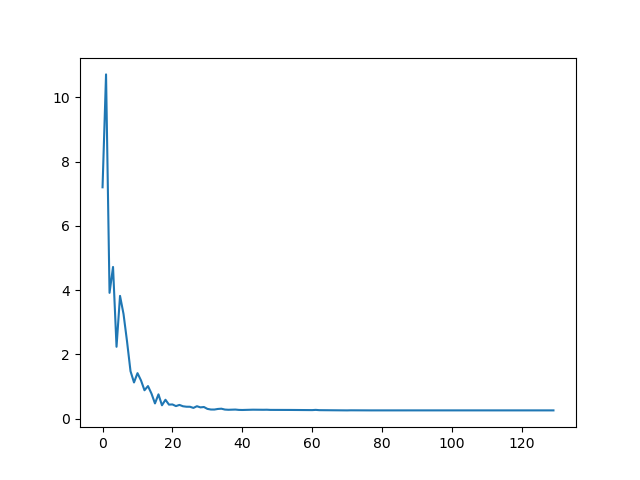

In [4]:
best_losses = np.array([sample['loss'] for sample in gen_best])

plt.figure()
plt.plot(best_losses)
plt.show()

<IPython.core.display.Javascript object>


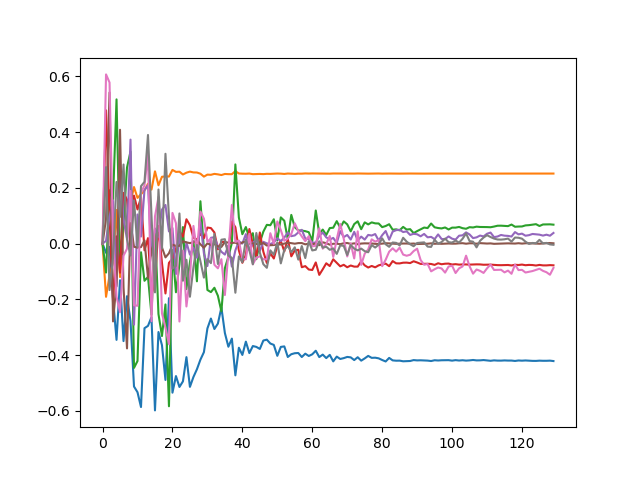

In [5]:
best_coords = np.array([sample['coordinate'] for sample in gen_best])
best_coords.shape

plt.figure()
plt.plot(best_coords[:,0])
plt.plot(best_coords[:,1])
plt.plot(best_coords[:,2])
plt.plot(best_coords[:,3])
plt.plot(best_coords[:,4])
plt.plot(best_coords[:,5])
plt.plot(best_coords[:,6])
plt.plot(best_coords[:,7])
plt.show()

<IPython.core.display.Javascript object>


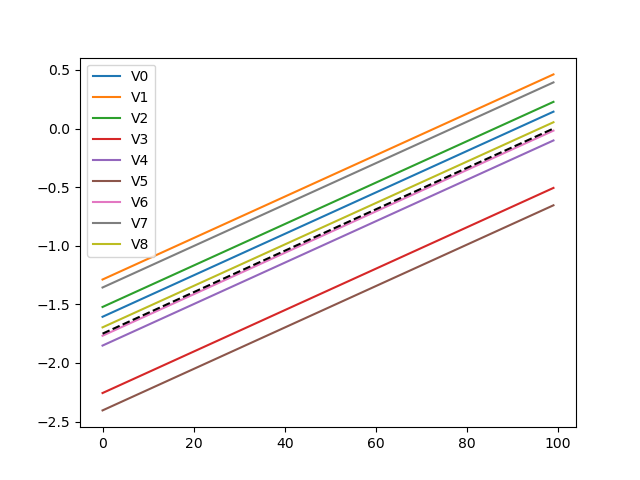

<IPython.core.display.Javascript object>


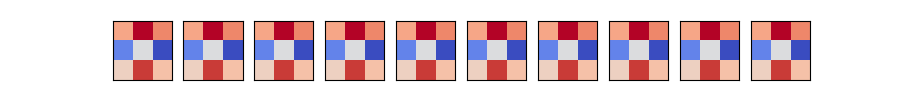

In [6]:
order=1
common_mode = np.linspace(-1.75, 0, 100)
bounds = (-3, 1)
X = best_coords[-1,:].reshape(order, -1)

polynomials = generate_polynomials(np.linspace(0,1,len(common_mode)), X) 

voltages = fourier_polynomials_to_voltages(polynomials,vals=common_mode)
voltages, penalty = new_point_array(np.array(voltages), bounds, offset=np.array(common_mode))

plt.figure()
for i in range(9):
    plt.plot(voltages[:,i], label=f'V{i}')

plt.plot(np.mean(voltages, axis=1), color='k', ls='--')
plt.legend()
plt.show()

fig, axs = plt.subplots(1, 10, figsize=(9, 1))
for i in range(axs.flatten().shape[0]):
    axs[i].imshow(voltages[10*i,:].reshape(3,3)-np.mean(voltages[10*i,:]), cmap='coolwarm')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

100%|██████████| 100/100 [04:51<00:00,  2.92s/it]


<IPython.core.display.Javascript object>


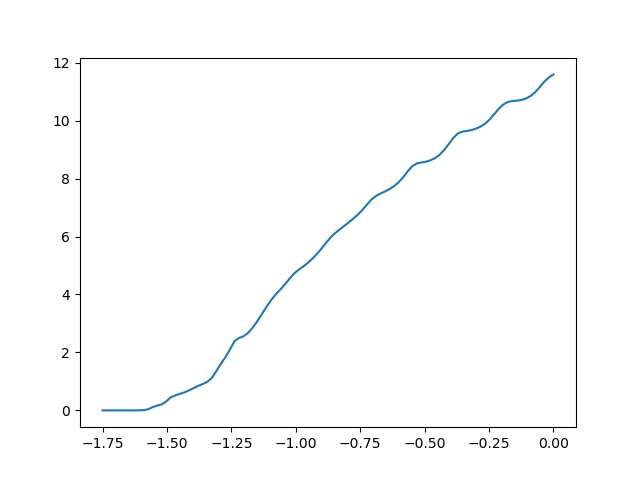

In [7]:
qpca = initialise_device(L=500, W=300, dis=(0.0005, 30))

def get_staricase(voltages):

    assert(voltages.shape[0]==9)

    qpca.set_gate('Vp1', voltages[0])
    qpca.set_gate('Vp2', voltages[1])
    qpca.set_gate('Vp3', voltages[2])
    qpca.set_gate('Vp4', voltages[3])
    qpca.set_gate('Vp5', voltages[4])
    qpca.set_gate('Vp6', voltages[5])
    qpca.set_gate('Vp7', voltages[6])
    qpca.set_gate('Vp8', voltages[7])
    qpca.set_gate('Vp9', voltages[8])
    
    return qpca.transmission()

with ProcessPoolExecutor() as executor:
    Gs = np.array(list(tqdm(executor.map(get_staricase, voltages), total=voltages.shape[0])))

plt.figure()
plt.plot(common_mode, Gs)
plt.show()

<IPython.core.display.Javascript object>


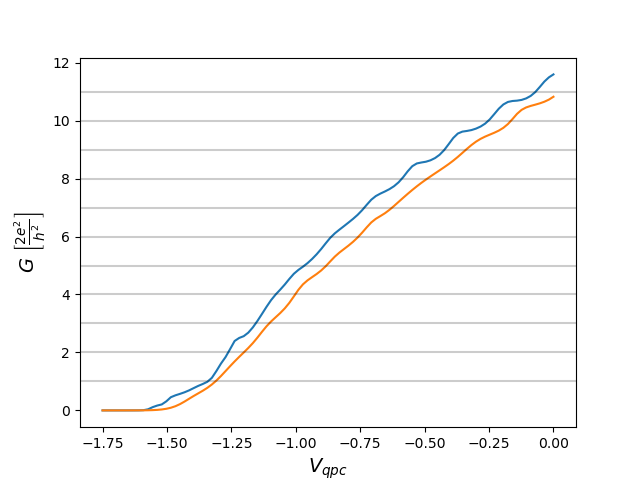

In [9]:
plt.figure()
plt.plot(common_mode, Gs)
plt.plot(common_mode, Gs2)
for i in range(1, int(max(Gs)+1)):
    plt.axhline(y=i, color='k', alpha=.2)
plt.xlabel(r'$V_{qpc}$', fontsize=14)
plt.ylabel(r'$G$ $\left[\frac{2e^2}{h^2}\right]$', fontsize=14)
plt.show()

In [8]:
stairs=staircasiness(cond_window=(1e-1, 11))
print(stairs.multiple_windows_histogram(np.array(Gs)))
print(stairs.window_loss(np.array(Gs)))

0.2528543593155913
0.8075190239060395


## Window loss

In [47]:
data = CmaesData().load('outcmaes/run_6/')
generations = data[-1]['iteration']
popsize = int((len(data)-1)/generations)
print(generations, popsize)

129 56


In [48]:
gen_best = [data[0]]

for g in range(generations):
    
    gen_g = data[1+g*popsize:1+(g+1)*popsize]
    losses = np.array([sample['loss'] for sample in gen_g])
    gen_best.append(gen_g[np.argmin(losses)])
    

<IPython.core.display.Javascript object>


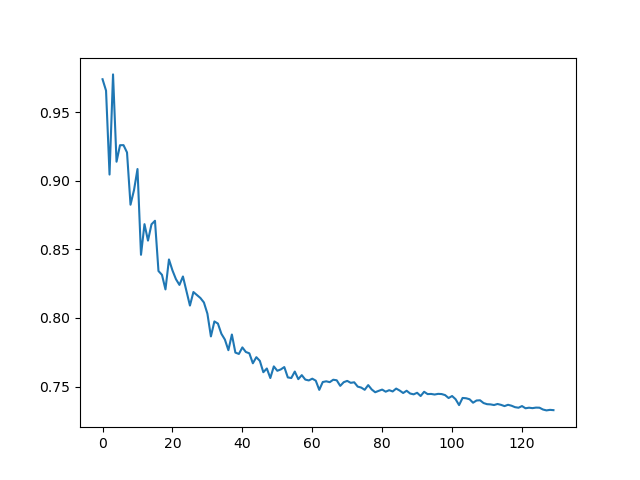

In [49]:
best_losses = np.array([sample['loss'] for sample in gen_best])

plt.figure()
plt.plot(best_losses)
plt.show()

<IPython.core.display.Javascript object>


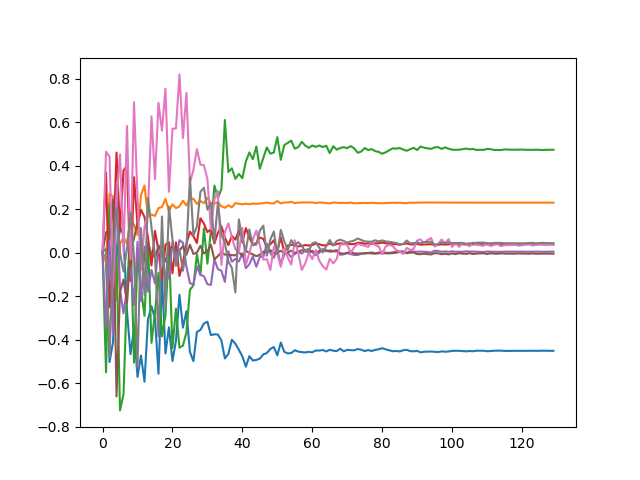

In [50]:
best_coords = np.array([sample['coordinate'] for sample in gen_best])
best_coords.shape

plt.figure()
plt.plot(best_coords[:,0])
plt.plot(best_coords[:,1])
plt.plot(best_coords[:,2])
plt.plot(best_coords[:,3])
plt.plot(best_coords[:,4])
plt.plot(best_coords[:,5])
plt.plot(best_coords[:,6])
plt.plot(best_coords[:,7])
plt.show()


<IPython.core.display.Javascript object>


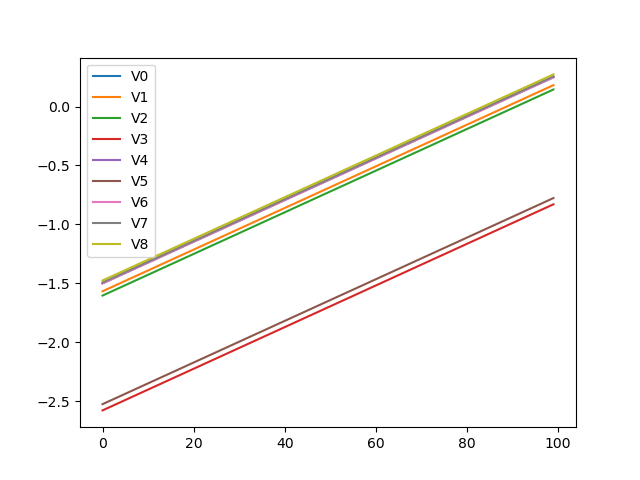

<IPython.core.display.Javascript object>


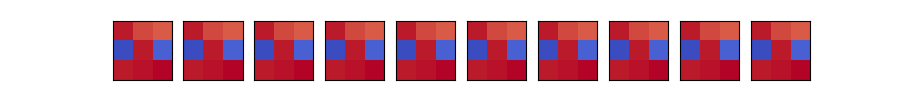

In [51]:
order=1
common_mode = np.linspace(-1.75, 0, 100)
bounds = (-3, 1)
X = best_coords[-1,:].reshape(order, -1)

polynomials = generate_polynomials(np.linspace(0,1,len(common_mode)), X) 

voltages = fourier_polynomials_to_voltages(polynomials,vals=common_mode)
voltages, penalty = new_point_array(np.array(voltages), bounds, offset=np.array(common_mode))

plt.figure()
for i in range(9):
    plt.plot(voltages[:,i], label=f'V{i}')
plt.legend()
plt.show()


fig, axs = plt.subplots(1, 10, figsize=(9, 1))
for i in range(axs.flatten().shape[0]):
    vmat = np.array([[voltages[10*i,0], voltages[10*i,1], voltages[10*i,2]],
                     [voltages[10*i,3], voltages[10*i,4], voltages[10*i,5]],
                     [voltages[10*i,6], voltages[10*i,7], voltages[10*i,8]]])
    axs[i].imshow(vmat, cmap='coolwarm')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


<IPython.core.display.Javascript object>


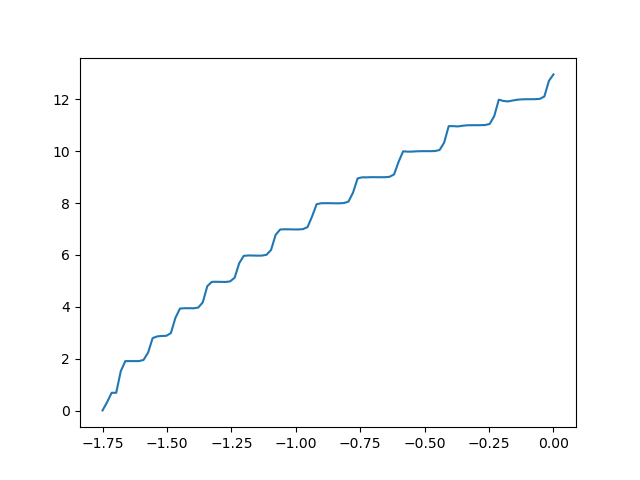

In [52]:
qpca = initialise_device(L=500, W=300)

def get_staricase(voltages):

    assert(voltages.shape[0]==9)

    qpca.set_gate('Vp1', voltages[0])
    qpca.set_gate('Vp2', voltages[1])
    qpca.set_gate('Vp3', voltages[2])
    qpca.set_gate('Vp4', voltages[3])
    qpca.set_gate('Vp5', voltages[4])
    qpca.set_gate('Vp6', voltages[5])
    qpca.set_gate('Vp7', voltages[6])
    qpca.set_gate('Vp8', voltages[7])
    qpca.set_gate('Vp9', voltages[8])
    
    return qpca.transmission()

with ProcessPoolExecutor() as executor:
    Gs = np.array(list(tqdm(executor.map(get_staricase, voltages), total=voltages.shape[0])))

plt.figure()
plt.plot(common_mode, Gs)
plt.show()

<IPython.core.display.Javascript object>


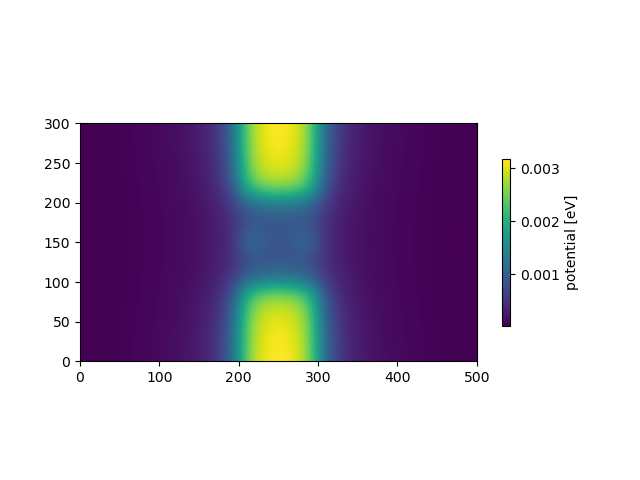

<IPython.core.display.Javascript object>


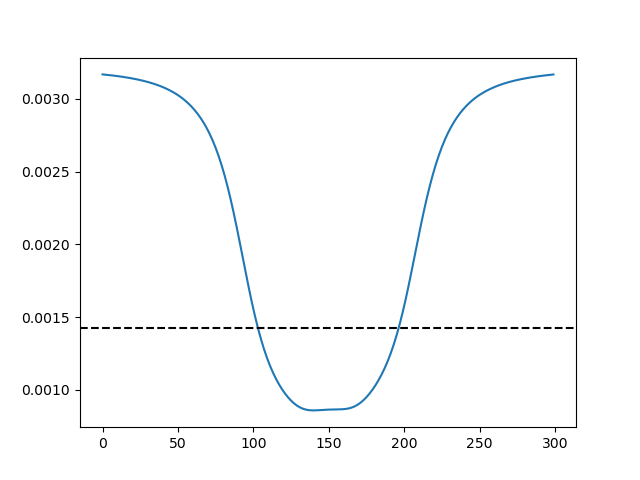

<IPython.core.display.Javascript object>


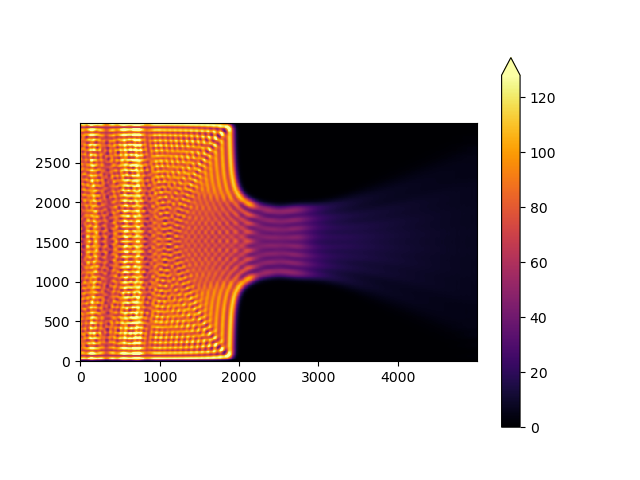

/tmp/ipykernel_2876884/1785391559.py:15: RuntimeWarning: The plotted data contains 0.60% of values overflowing upper limit 128.089 
  kwant.plotter.map(qpca.sysf, den, cmap='inferno')


In [53]:
qpca.set_gate('Vp1', voltages[50, 0])
qpca.set_gate('Vp2', voltages[50, 1])
qpca.set_gate('Vp3', voltages[50, 2])
qpca.set_gate('Vp4', voltages[50, 3])
qpca.set_gate('Vp5', voltages[50, 4])
qpca.set_gate('Vp6', voltages[50, 5])
qpca.set_gate('Vp7', voltages[50, 6])
qpca.set_gate('Vp8', voltages[50, 7])
qpca.set_gate('Vp9', voltages[50, 8])

qpca.plot_potential()
qpca.plot_potential_cross_sect()

den = qpca.density(0)
kwant.plotter.map(qpca.sysf, den, cmap='inferno')
plt.show()

<IPython.core.display.Javascript object>


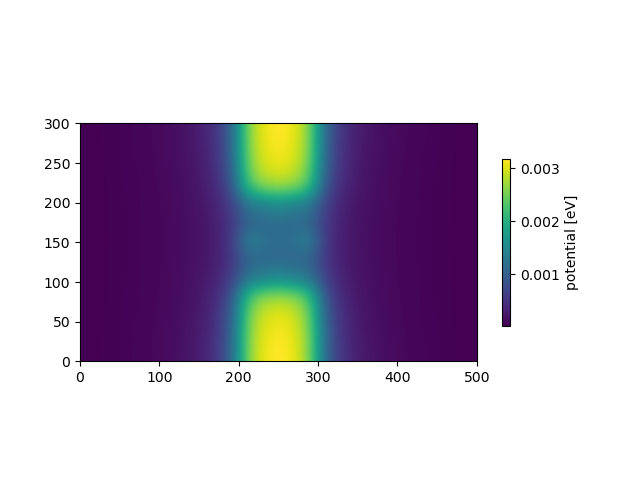

<IPython.core.display.Javascript object>


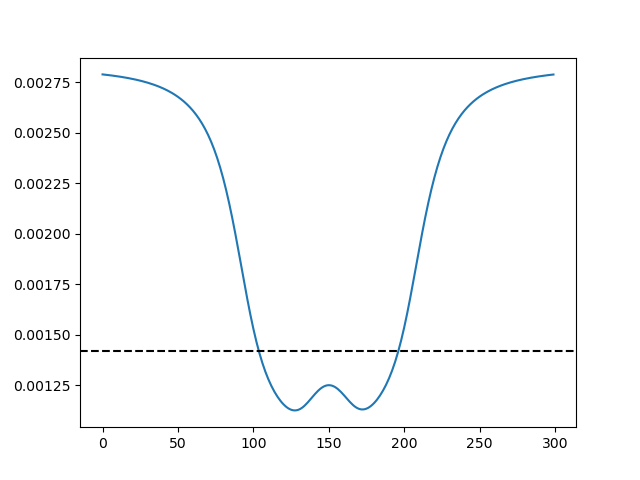

<IPython.core.display.Javascript object>


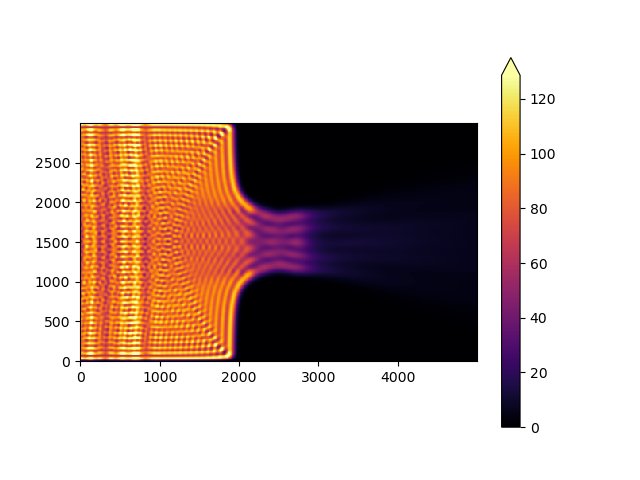

/tmp/ipykernel_2876884/3924659055.py:15: RuntimeWarning: The plotted data contains 0.59% of values overflowing upper limit 128.661 
  kwant.plotter.map(qpca.sysf, den, cmap='inferno')


In [57]:
qpca.set_gate('Vp1', voltages[25, 0])
qpca.set_gate('Vp2', voltages[25, 1])
qpca.set_gate('Vp3', voltages[25, 2])
qpca.set_gate('Vp4', voltages[25, 3])
qpca.set_gate('Vp5', voltages[25, 4])
qpca.set_gate('Vp6', voltages[25, 5])
qpca.set_gate('Vp7', voltages[25, 6])
qpca.set_gate('Vp8', voltages[25, 7])
qpca.set_gate('Vp9', voltages[25, 8])

qpca.plot_potential()
qpca.plot_potential_cross_sect(x=220)

den = qpca.density(0)
kwant.plotter.map(qpca.sysf, den, cmap='inferno')
plt.show()

<IPython.core.display.Javascript object>


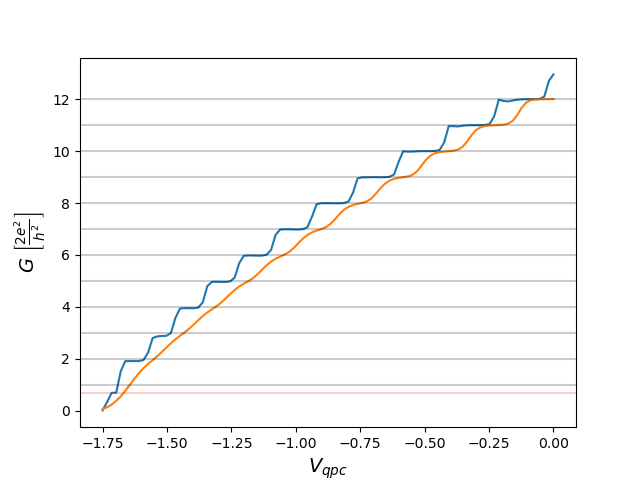

In [22]:
plt.figure()
plt.plot(common_mode, Gs)
plt.plot(common_mode, Gs2)
for i in range(1, int(max(Gs)+1)):
    plt.axhline(y=i, color='k', alpha=.2)
plt.axhline(y=0.7, color='r', alpha=.2)
plt.xlabel(r'$V_{qpc}$', fontsize=14)
plt.ylabel(r'$G$ $\left[\frac{2e^2}{h^2}\right]$', fontsize=14)
plt.show()

In [18]:
stairs=staircasiness(cond_window=(1e-1, 11))
print(stairs.multiple_windows_histogram(np.array(Gs)))
print(stairs.window_loss(np.array(Gs)))

0.3645703609829286
0.7328435178897414


## Unoptimised staircase

100%|██████████| 100/100 [04:48<00:00,  2.88s/it]


<IPython.core.display.Javascript object>


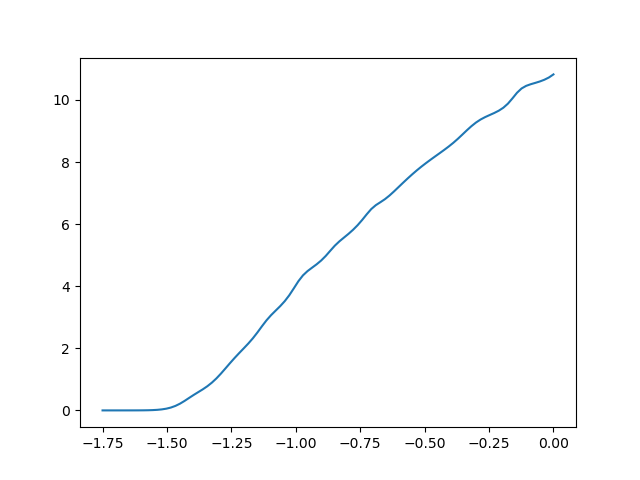

In [8]:
Gs2 = None
uniform_sweep = np.tile(common_mode, (9, 1)).T

with ProcessPoolExecutor() as executor:
    Gs2 = np.array(list(tqdm(executor.map(get_staricase, uniform_sweep), total=uniform_sweep.shape[0])))

plt.figure()
plt.plot(common_mode, Gs2)
plt.show()

In [ ]:
print(stairs.multiple_windows_histogram(np.array(Gs2)))
print(stairs.window_loss(np.array(Gs2)))

## Perfect staircase

In [ ]:
perfect_stairs = np.append(np.zeros(4), np.array([i*np.ones(8) for i in range(1,13)]).flatten())

plt.figure()
plt.plot(common_mode, perfect_stairs)
plt.show()

print(stairs.multiple_windows_histogram(np.array(perfect_stairs)))
print(stairs.window_loss(np.array(perfect_stairs)))

<IPython.core.display.Javascript object>


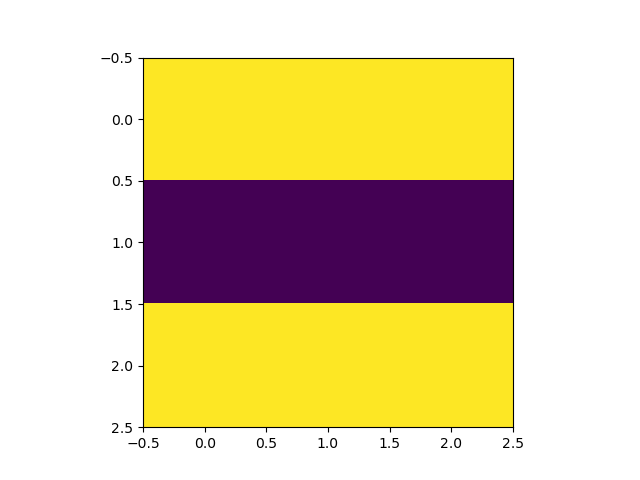

In [40]:
plt.figure()
plt.imshow(np.array([[1, 1, 1],[-1, -1, -1],[1, 1, 1]]))
plt.show()